In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("/home/calvin/Desktop/NBA-Games-Predictor/game_stats.csv")

**Problem**

The objective is to analyze a NBA Game Boxscore dataset and predict the win/loss outcome of games.

**Data Wrangling**

Each game is assigned a unique integer id.

In [2]:
rows = df.shape[0]
df['GAMEID'] = np.arange(0, rows, 1)

Since the Matchup column is in an unpleasant format, we will reformat it by creating a new column called Home/Away. "H" denotes home court advantage and "A" denotes away court.

In [3]:
s = df['MATCHUP'].str.contains('@', regex=False)
df['HOME/AWAY'] = s
df['HOME/AWAY'] = np.where(df['HOME/AWAY'] == True, "A", "H")

Win/Loss values are given in strings, so we will convert the values. "1" denotes a win and "0" denotes a loss.

In [4]:
df['W/L'] = np.where(df['W/L'] == 'W', 1, 0)

In [5]:
df.head()

,TEAM,DATE,MATCHUP,W/L,MIN,PTS,FGM,FGA,FG%,3PM,...,DREB,REB,AST,STL,BLK,TOV,PF,+/-,GAMEID,HOME/AWAY
0,ATL,01/10/2018,ATL @ DEN,1,239,110,40,80,50.0,12,...,38,44,25,6,4,16,23,13.0,0,A
1,ATL,04/10/2018,ATL vs. PHI,0,240,113,41,98,41.8,13,...,31,39,27,10,3,10,24,-8.0,1,H
2,ATL,04/06/2018,ATL @ WAS,1,239,103,38,79,48.1,11,...,43,50,24,5,5,18,22,6.0,2,A
3,ATL,04/04/2018,ATL vs. MIA,0,239,86,33,90,36.7,9,...,38,48,20,5,6,15,16,-29.0,3,H
4,ATL,04/03/2018,ATL @ MIA,0,240,98,37,88,42.0,13,...,37,49,24,10,1,15,15,-3.0,4,A


**Partitioning the Data Set**

We will split the dataset into a traning set and a test set. Creation of the model will be done on the training set, then tested using the test set. We will use a 80/20 split.

In [6]:
# create training and testing vars
train_df, test_df = train_test_split(df, test_size=0.2)
print (train_df.shape)
print (test_df.shape)

(1968, 26)
(492, 26)


**Data Exploration**

We can see some of the basic statictics of the dataset with the describe function such as the mean, min, and max. It gives us a brief overview of what the dataset looks like.


In [7]:
train_df.describe()

,W/L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,+/-,GAMEID
count,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,...,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000
mean,0.495935,241.507114,106.359248,39.632622,86.160061,46.088008,10.461890,29.016260,35.968750,16.632114,...,9.751016,33.725102,43.476118,23.220020,7.670224,4.819106,13.581809,19.891768,-0.120224,1226.923780
std,0.500111,6.719294,12.062138,5.090707,6.844655,5.462929,3.549429,6.649687,9.025187,5.772049,...,3.594183,5.344858,6.395970,5.180314,2.922049,2.500798,3.671627,4.183874,13.879068,706.394133
min,0.000000,237.000000,69.000000,22.000000,66.000000,28.200000,1.000000,11.000000,5.600000,1.000000,...,1.000000,18.000000,22.000000,9.000000,0.000000,0.000000,3.000000,8.000000,-61.000000,2.000000
25%,0.000000,240.000000,98.000000,36.000000,81.000000,42.400000,8.000000,24.000000,29.700000,13.000000,...,7.000000,30.000000,39.000000,20.000000,6.000000,3.000000,11.000000,17.000000,-9.000000,619.750000
50%,0.000000,240.000000,106.000000,39.000000,86.000000,46.100000,10.000000,29.000000,35.700000,16.000000,...,9.000000,34.000000,43.000000,23.000000,7.000000,5.000000,14.000000,20.000000,-1.000000,1220.500000
75%,1.000000,241.000000,115.000000,43.000000,91.000000,49.500000,13.000000,33.000000,41.950000,20.000000,...,12.000000,37.000000,48.000000,27.000000,9.000000,6.000000,16.000000,23.000000,9.000000,1836.250000
max,1.000000,317.000000,149.000000,56.000000,114.000000,66.700000,24.000000,59.000000,71.400000,41.000000,...,23.000000,56.000000,66.000000,46.000000,17.000000,16.000000,29.000000,42.000000,61.000000,2459.000000


This function tells us the correlation between each of the predictors and our target variable. It is useful in telling us which predictors are worth keeping or dropping. In this table, plus/minus has the highest positive correlation with win/loss. Turnovers have a negative correlation with win/loss. Minutes played has the lowest correlation in magnitude. 

In [8]:
train_df.corr()['W/L'].sort_values(ascending=False)

W/L       1.000000
+/-       0.803126
PTS       0.474591
FG%       0.440717
FGM       0.391700
DREB      0.353245
3P%       0.311560
AST       0.309315
REB       0.296148
3PM       0.259820
BLK       0.179894
STL       0.142239
FTM       0.141079
FTA       0.115671
FT%       0.077778
3PA       0.054137
MIN       0.008329
OREB      0.001699
GAMEID   -0.016019
FGA      -0.021122
PF       -0.080026
TOV      -0.113196
Name: W/L, dtype: float64

**Feature Engineering**

Next, we will consider which features to keep or drop based on data visualizations or assumptions.

**Assumptions**

We will drop features such as attempts and makes because they will have no affect on the model. They are already captured in the corresponding percentage feature.

We will also assume that we don't have plus/minus as a feature because that is only determined after a game.

**Points Feature**

Prediction: Teams that score more points have a higher chance of winning.

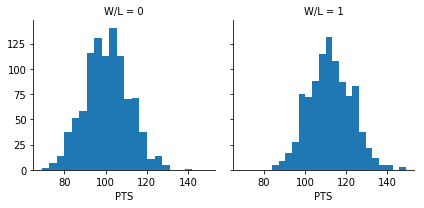

In [9]:
g = sns.FacetGrid(train_df, col='W/L')
g.map(plt.hist, 'PTS', bins=20)

As predicted, teams that score more points are more likely to win. Therefore, it is essential to our model.

**Rebounds Feature**

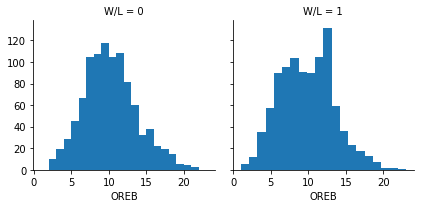

In [10]:
g = sns.FacetGrid(train_df, col='W/L')
g.map(plt.hist, 'OREB', bins=20)

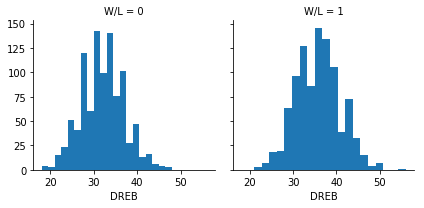

In [11]:
g = sns.FacetGrid(train_df, col='W/L')
g.map(plt.hist, 'DREB', bins=20)

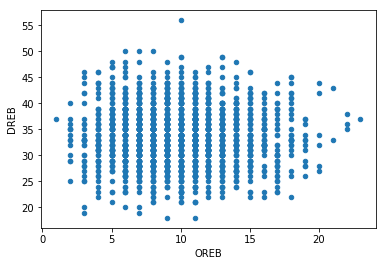

In [12]:
train_df.plot.scatter('OREB', 'DREB', s=None, c=None)

It seems like offensive rebounds and defensive rebounds have no correlation. We will consider dropping offensive rebounds because the distribution between when it is a win versus a loss is fairly similar.

**Home/Away Feature**

Prediction: Teams that are playing in their home court have an advantage and are more likely to win. We will see if that's true. 

In [13]:
temp1 = train_df['HOME/AWAY'].value_counts().sort_index()
temp2 = train_df.pivot_table(values='W/L',index=['HOME/AWAY'],aggfunc=lambda x: x.mean())
print ("Frequency Table for Home/Away Games:")
print (temp1)

print ("\nProbility of winning by home/away games:") 
print (temp2)

Frequency Table for Home/Away Games:
A    970
H    998
Name: HOME/AWAY, dtype: int64

Probility of winning by home/away games:
                W/L
HOME/AWAY          
A          0.415464
H          0.574148


Text(0.5, 1.0, 'Probability of winning by home/away games')

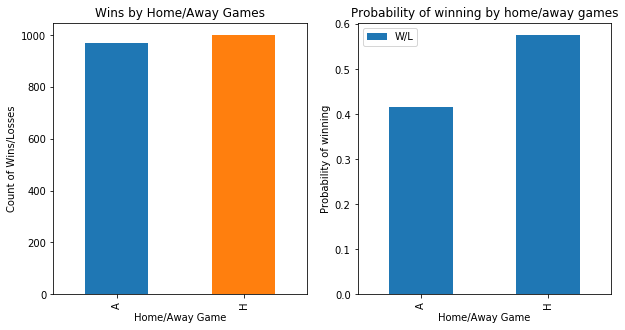

In [14]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols=2, figsize=(10,5))
ax1.set_xlabel('Home/Away Game')
ax1.set_ylabel('Count of Wins/Losses')
ax1.set_title("Wins by Home/Away Games")
temp1.plot(kind='bar', ax=ax1)

temp2.plot(kind='bar', ax=ax2)
ax2.set_xlabel('Home/Away Game')
ax2.set_ylabel('Probability of winning')
ax2.set_title("Probability of winning by home/away games")

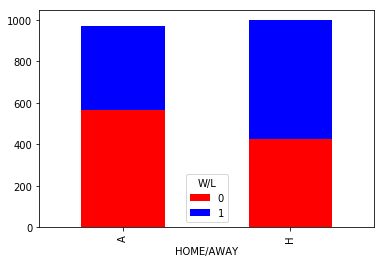

In [15]:
temp3 = pd.crosstab(train_df['HOME/AWAY'], train_df['W/L'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

As predicted, teams playing at home have a higher chance at winning. The home/away feature is essential in our predictions.

**Predictive Modelling**

In [16]:
train_df = train_df.copy()

from sklearn.preprocessing import LabelEncoder
var_mod = ['TEAM','DATE','MATCHUP','HOME/AWAY']
le = LabelEncoder()
for i in var_mod:
    train_df.loc[:,i] = le.fit_transform(train_df.loc[:,i].astype('str'))
train_df.dtypes

TEAM           int64
DATE           int64
MATCHUP        int64
W/L            int64
MIN            int64
PTS            int64
FGM            int64
FGA            int64
FG%          float64
3PM            int64
3PA            int64
3P%          float64
FTM            int64
FTA            int64
FT%          float64
OREB           int64
DREB           int64
REB            int64
AST            int64
STL            int64
BLK            int64
TOV            int64
PF             int64
+/-          float64
GAMEID         int64
HOME/AWAY      int64
dtype: object

In [17]:
train_df.head()

,TEAM,DATE,MATCHUP,W/L,MIN,PTS,FGM,FGA,FG%,3PM,...,DREB,REB,AST,STL,BLK,TOV,PF,+/-,GAMEID,HOME/AWAY
1532,17,143,874,1,240,113,45,82,54.9,7,...,38,46,29,4,7,15,17,6.0,1532,0
2071,24,51,1261,1,241,116,44,84,52.4,15,...,37,47,27,10,2,17,15,17.0,2071,1
386,3,145,177,0,266,111,40,100,40.0,10,...,41,50,22,7,11,11,20,-8.0,386,1
1031,11,163,594,0,240,94,38,79,48.1,10,...,32,39,27,8,4,15,17,-4.0,1031,1
256,1,73,76,0,240,105,39,93,41.9,13,...,36,46,22,6,11,12,36,-6.0,256,1


In [18]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
    #Fit the model:
    model.fit(data[predictors],data[outcome])
  
    #Make predictions on training set:
    predictions = model.predict(data[predictors])
    
    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

    #Perform k-fold cross-validation with 5 folds
    kf = KFold(n_splits=5, random_state=None, shuffle=False)
    error = []
    for train, test in kf.split(train_df):
        # Filter training data
        train_predictors = (data[predictors].iloc[train,:])
    
        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]

        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)

        #Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

    #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome])

In [19]:
outcome_var = 'W/L'
model = LogisticRegression()
predictor_var = ["PTS","FG%","3P%","FT%","DREB","AST","STL","BLK","TOV","PF","HOME/AWAY"]
classification_model(model, train_df, predictor_var, outcome_var)

Accuracy : 79.980%
Cross-Validation Score : 78.710%


In [20]:
for i in var_mod:
    test_df.loc[:,i] = le.fit_transform(test_df.loc[:,i].astype('str'))
test_df.dtypes

TEAM           int64
DATE           int64
MATCHUP        int64
W/L            int64
MIN            int64
PTS            int64
FGM            int64
FGA            int64
FG%          float64
3PM            int64
3PA            int64
3P%          float64
FTM            int64
FTA            int64
FT%          float64
OREB           int64
DREB           int64
REB            int64
AST            int64
STL            int64
BLK            int64
TOV            int64
PF             int64
+/-          float64
GAMEID         int64
HOME/AWAY      int64
dtype: object

In [21]:
predictions = model.predict(test_df[["PTS","FG%","3P%","FT%","DREB","AST","STL","BLK","TOV","PF","HOME/AWAY"]])

submission = pd.DataFrame({"GAMEID": test_df["GAMEID"], "W/L": predictions})

submission.to_csv("game_submission.csv", index=False)

**Predictions**

In [22]:
correct = 0
for gameid in submission.loc[:,"GAMEID"]:
    if (submission.loc[gameid,:]["W/L"] == test_df.loc[gameid,:]["W/L"]):
        correct = correct + 1
print ("Accuracy : %s" % "{0:.3%}".format(correct/submission.shape[0]))

Accuracy : 81.301%
